Here we test: 

- ADWIN

In [40]:
import numpy as np

from skmultiflow.drift_detection.adwin import ADWIN

adwin = ADWIN()

In [21]:
import sklearn as sk
import pandas as pd

In [35]:
%%time
data = sk.datasets.fetch_covtype()

CPU times: user 567 ms, sys: 112 ms, total: 680 ms
Wall time: 681 ms


In [45]:
df = df.sort_values([0])

In [46]:
df.reset_index(drop=True, inplace=True)

In [36]:
print(data['DESCR'])

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like object
with the feature matrix in the ``data`` member
and the target values in ``target``.
The dataset will be d

In [37]:
df = pd.DataFrame(data['data'])
df['target'] = data['target']

In [57]:
df.shape

(581012, 55)

In [63]:
df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,target
0,1859.0,18.0,12.0,67.0,11.0,90.0,211.0,215.0,139.0,792.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [59]:

        #print('Change detected - at index: ' + str(i))

CPU times: user 1min, sys: 0 ns, total: 1min
Wall time: 1min


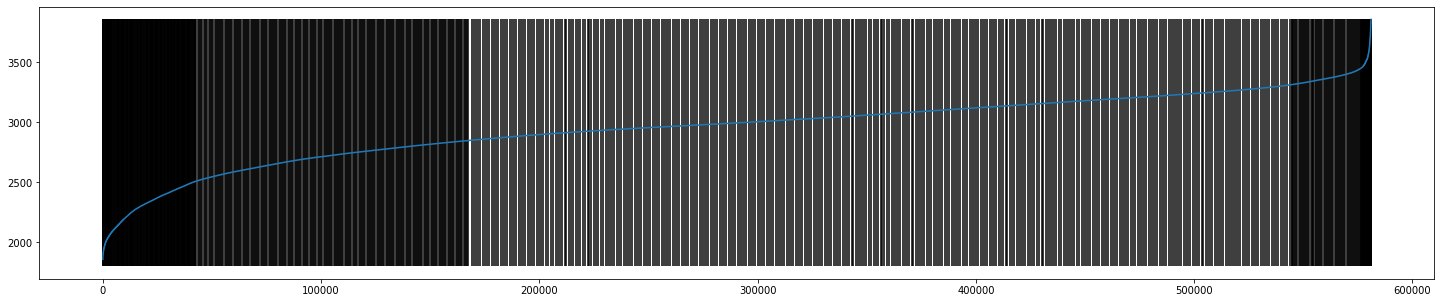

In [67]:
%%time
c = []
for i in range(len(df)):

    adwin.add_element(df[0][i])
    if adwin.detected_change():
        c.append(i)

plt.figure(figsize=(30, 5))
plt.plot(df[0])
for i in c:
    plt.vlines(x=i, ymin=1800, ymax=3858)

CPU times: user 1min 16s, sys: 6.48 ms, total: 1min 16s
Wall time: 1min 16s


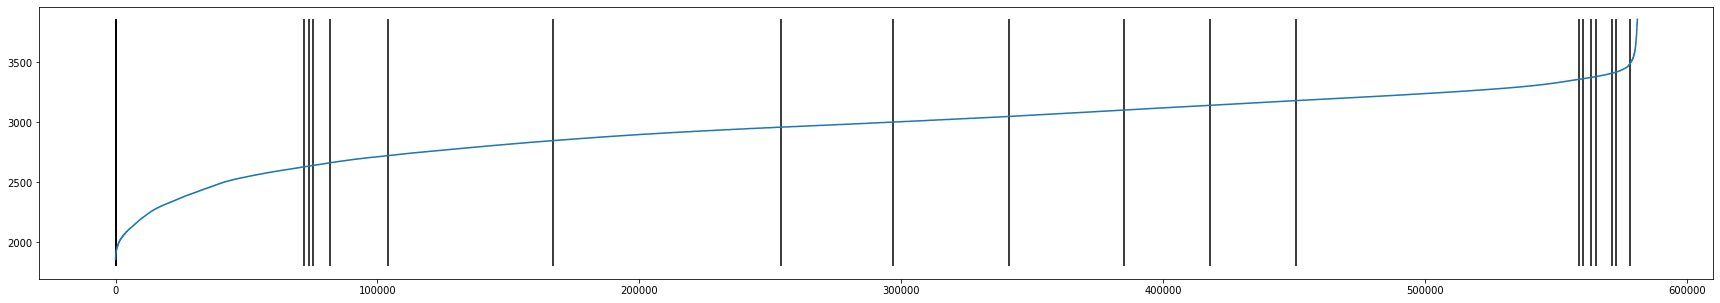

In [68]:
%%time
c = []
for i in range(len(df)):
    adwin.add_element(df['target'][i])
    if adwin.detected_change():
        c.append(i)

plt.figure(figsize=(30, 5))
plt.plot(df[0])
for i in c:
    plt.vlines(x=i, ymin=1800, ymax=3858)

In [72]:
df[0].max()

3858.0

In [ ]:
%%time
for col in df.columns:
    adwin = ADWIN()
    print('**********************************')
    print(col)
    print('**********************************')
    c = []
    for i in range(len(df)):
        adwin.add_element(df[col][i])
        if adwin.detected_change():
            c.append(i)

    plt.figure(figsize=(30, 5))
    plt.plot((df[0]-df[0].max())/(df[0].max()-df[0].min()))
    plt.plot((df[col]-df[col].max())/(df[col].max()-df[col].min()))
    for i in c:
        plt.vlines(x=i, ymin=0, ymax=1)
    plt.show()

**********************************
0
**********************************


In [6]:
data_stream = np.random.randint(2, size=2000)

In [3]:
data_stream

array([1, 0, 1, ..., 6, 6, 6])

In [4]:
import matplotlib.pyplot as plt